In [385]:
# Скрипт для демонстрации загрузки геоданных из OSM и работы с ними

In [298]:
from shapely.geometry import Polygon,LineString

from shapely.ops import linemerge, unary_union, polygonize

import datetime
import numpy as np
import pysal
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import shape
from shapely.geometry import Point
import requests
import random
import overpy
import contextily as ctx
import h3

import pandas as pd

<b> Задача </b> : посчитать число магазинов в округах Москвы и визуализировать плотность на карте

#### Загрузка границ округов

In [185]:
overpass_query = \
"""[out:json]
;
area["name:ru"="Москва"];
(
  relation
    ["boundary"="administrative"]
    ["admin_level"="5"]
    (area);
);
(
  ._;
  >;
);
out geom;
 """

#### Использование библиотеки overpy

In [186]:
api = overpy.Overpass()

moscow_borders = api.query(overpass_query)


In [301]:
lss = []
for ii_w,way in enumerate(moscow_borders.ways):
    """ цикл по ребрам для записи координат вершин"""
    ls_coords = []

    for node in way.nodes:
        ls_coords.append((node.lon,node.lat)) # 

    lss.append(LineString(ls_coords)) # сохраняем координаты в линию  -linestring


merged = linemerge([*lss]) # соединяем все линии
borders = unary_union(merged) # linestrings в MultiLineString
polygons = list(polygonize(borders))

In [352]:
gdf_zones_overpass= pd.Series(polygons, index=range(len(polygons))).to_frame()
gdf_zones_overpass.columns=['geometry']

In [354]:
gdf_zones_overpass =gpd.GeoDataFrame(gdf_zones_overpass, crs='epsg:4326', geometry='geometry')

<AxesSubplot:>

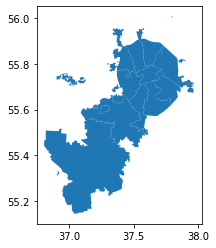

In [355]:
gdf_zones_overpass.plot()

#### Использование библиотеки requests

In [189]:
overpass_url = "http://overpass-api.de/api/interpreter"
response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.9 76e5016d',
 'osm3s': {'timestamp_osm_base': '2021-09-19T21:07:13Z',
  'timestamp_areas_base': '2021-09-19T20:28:18Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 43053520,
   'lat': 55.8271415,
   'lon': 37.4906454},
  {'type': 'node', 'id': 43053521, 'lat': 55.8266274, 'lon': 37.4886892},
  {'type': 'node', 'id': 43053522, 'lat': 55.8264847, 'lon': 37.4871593},
  {'type': 'node', 'id': 43053524, 'lat': 55.8264788, 'lon': 37.486376},
  {'type': 'node', 'id': 43053526, 'lat': 55.826517, 'lon': 37.4856033},
  {'type': 'node', 'id': 43053532, 'lat': 55.8270137, 'lon': 37.4813937},
  {'type': 'node', 'id': 43053534, 'lat': 55.8270233, 'lon': 37.4803853},
  {'type': 'node', 'id': 43053540, 'lat': 55.8265958, 'lon': 37.4784884},
  {'type': 'node', 'id': 43053542, 'lat': 55.8266713, 'lon': 37.4781004},
  {'type': 'node', 

In [93]:
set([i['type'] for i in response.json()['elements']])

{'node', 'relation', 'way'}

In [327]:
dict_response = response.json()

In [346]:
dict_response['elements'][13717]

{'type': 'way',
 'id': 23680719,
 'bounds': {'minlat': 55.7668408,
  'minlon': 37.6975025,
  'maxlat': 55.7671332,
  'maxlon': 37.6979331},
 'nodes': [256417132, 249684220],
 'geometry': [{'lat': 55.7668408, 'lon': 37.6975025},
  {'lat': 55.7671332, 'lon': 37.6979331}],
 'tags': {'highway': 'secondary',
  'lanes': '2',
  'lit': 'yes',
  'name': 'Госпитальная площадь',
  'oneway': 'no',
  'surface': 'asphalt'}}

In [349]:
for way in dict_response['elements']:
    
    if way['type']=='way':
        line = LineString([(node['lon'],node['lat']) for node in way['geometry']]) # 
        lss.append(line) # сохраняем координаты в линию  -linestring


merged = linemerge([*lss]) # соединяем все линии
borders = unary_union(merged)#объединяет linestrings в multistring

polygons = list(polygonize(borders))

In [359]:
gdf_zones_url= pd.Series(polygons, index=range(len(polygons))).to_frame()
gdf_zones_url.columns=['geometry']

In [361]:
gdf_zones_url =gpd.GeoDataFrame(gdf_zones_url, crs='epsg:4326', geometry='geometry')

<AxesSubplot:>

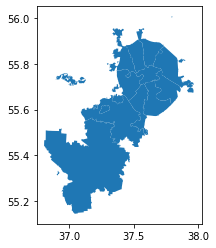

In [362]:
gdf_zones_url.plot()

#### Загрузка файла geojson из overpass turbo c помощью библиотеки geopandas

In [101]:
# ссылка на overpass turbo - https://overpass-turbo.eu/
#
# Скрипт на выгрузку: 
# [out:json];
# area["name:ru"="Москва"];
# (
# rel["boundary"="administrative"]["admin_level"="5"]
# (area);
# );
#  /*added by auto repair*/
#  (._;>;);
#  /*end of auto repair*/
#  out;

In [ ]:
df_moscow_borders = gpd.read_file('moscow_borders.geojson')

In [102]:
df_moscow_borders.head()

,id,@id,addr:country,addr:region,admin_level,boundary,name,name:be,name:de,name:en,...,public_transport,material,wheelchair,train,transport,network,traffic_signals:direction,amenity,motor_vehicle,geometry
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55..."
1,relation/226149,relation/226149,RU,Москва,5,administrative,Западный административный округ,Заходняя адміністрацыйная акруга,Westlicher Verwaltungsbezirk,Western Administrative Okrug,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((36.91270 55.74751, 36.90939 55..."
2,relation/446092,relation/446092,RU,Москва,5,administrative,Северо-Западный административный округ,Паўночна-заходняя адміністрацыйная акруга,Nordwestlicher Verwaltungsbezirk,North-Western Administrative Okrug,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.38505 55.80931, 37.38496 55.80906..."
3,relation/1252558,relation/1252558,RU,Москва,5,administrative,Северо-Восточный административный округ,Паўночна-усходняя адміністрацыйная акруга,Nordöstlicher Verwaltungsbezirk,North-Eastern Administrative Okrug,...,None,None,None,None,None,None,None,None,None,"POLYGON ((37.58811 55.79259, 37.58822 55.79257..."
4,relation/1278703,relation/1278703,RU,Москва,5,administrative,Юго-Восточный административный округ,Паўднёва-усходняя адміністрацыйная акруга,Südöstlicher Verwaltungsbezirk,South-Eastern Administrative Okrug,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.96522 55.70970, 37.96597 55..."


In [106]:
type(df_moscow_borders)

geopandas.geodataframe.GeoDataFrame

In [109]:
df_moscow_borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

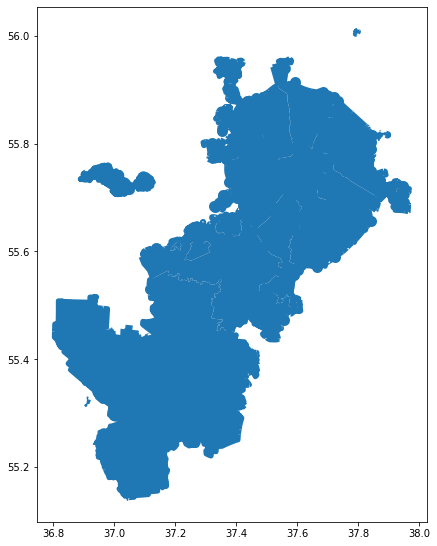

In [113]:
df_moscow_borders.plot(figsize=(7,10))

In [114]:
df_moscow_borders.geometry

0      MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...
1      MULTIPOLYGON (((36.91270 55.74751, 36.90939 55...
2      POLYGON ((37.38505 55.80931, 37.38496 55.80906...
3      POLYGON ((37.58811 55.79259, 37.58822 55.79257...
4      MULTIPOLYGON (((37.96522 55.70970, 37.96597 55...
                             ...                        
657                            POINT (37.71879 55.85899)
658                            POINT (37.71763 55.86062)
659                            POINT (37.66404 55.78674)
660                            POINT (37.69700 55.73365)
661                            POINT (37.61162 55.72129)
Name: geometry, Length: 662, dtype: geometry

#### Вычисляем площадь округов

In [115]:
df_moscow_borders.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      0.014678
1      0.027710
2      0.013363
3      0.014593
4      0.017554
         ...   
657    0.000000
658    0.000000
659    0.000000
660    0.000000
661    0.000000
Length: 662, dtype: float64

In [116]:
df_moscow_borders_mercator  = df_moscow_borders.to_crs('epsg:32637')# меняем проекцию для корректного расчета расстояний

In [126]:
df_moscow_borders_mercator.geometry

0      MULTIPOLYGON (((399367.992 6197550.523, 399637...
1      MULTIPOLYGON (((368982.988 6179951.805, 368777...
2      POLYGON ((398788.735 6186036.314, 398782.094 6...
3      POLYGON ((411475.701 6183898.179, 411482.512 6...
4      MULTIPOLYGON (((434981.373 6174256.121, 435029...
                             ...                        
657                       POINT (419805.216 6191128.184)
658                       POINT (419736.228 6191310.795)
659                       POINT (416223.489 6183152.288)
660                       POINT (418179.348 6177204.668)
661                       POINT (412790.987 6175933.282)
Name: geometry, Length: 662, dtype: geometry

In [118]:
df_moscow_borders['area']=df_moscow_borders_mercator.area

In [125]:
df_moscow_borders['area'].value_counts() # в геометрии есть точки, вершины границ округов, которые нужно убрать

0.000000e+00    651
1.022907e+08      1
1.938412e+08      1
9.320501e+07      1
1.016699e+08      1
1.228264e+08      1
1.315037e+08      1
1.112913e+08      1
1.547547e+08      1
6.616221e+07      1
3.595210e+08      1
1.087381e+09      1
Name: area, dtype: int64

In [127]:
df_moscow_borders = df_moscow_borders[df_moscow_borders['area']>0]

<AxesSubplot:>

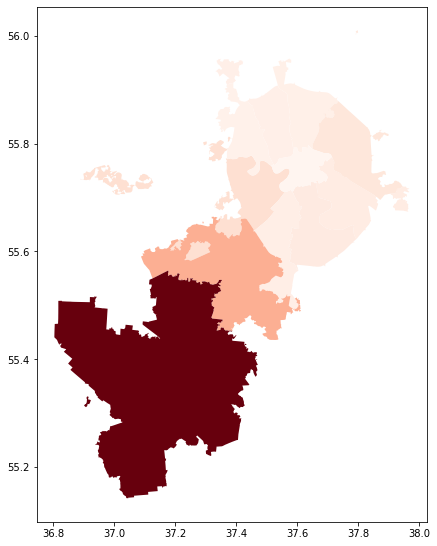

In [363]:
df_moscow_borders.plot(figsize=(7,10),column='area', cmap='Reds')# визуализируем, раскрашивая по размеру площади

#### Загружаем супермаркеты

In [367]:
query_sups="""area["name"='Москва'];
        (
            node['shop'='supermarket'](area);
        );
        out;
        """
result1 = api.query(query_sups)

In [368]:
gdf_stores = gpd.GeoDataFrame([ Point(x.lon, x.lat) for x in result1.nodes])
gdf_stores.columns=['geometry']

In [369]:
gdf_stores.head()

,geometry
0,POINT (37.20753 55.99511)
1,POINT (37.83734 55.81149)
2,POINT (37.75046 55.67314)
3,POINT (37.45849 55.71639)
4,POINT (37.46136 55.71902)


Задаем систему координат

In [168]:
gdf_stores.crs

In [370]:
gdf_stores = gdf_stores.set_crs('epsg:4326')

In [371]:
gdf_stores.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Сцепляем округа и магазины

In [372]:
gdf_msc_regions_shops = gpd.sjoin(df_moscow_borders, gdf_stores, op='contains', how='left')

In [373]:
gdf_msc_regions_shops.head()

,id,@id,addr:country,addr:region,admin_level,boundary,name,name:be,name:de,name:en,...,wheelchair,train,transport,network,traffic_signals:direction,amenity,motor_vehicle,geometry,area,index_right
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...",1.022907e+08,1949
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...",1.022907e+08,777
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...",1.022907e+08,704
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...",1.022907e+08,2318
0,relation/162903,relation/162903,RU,Москва,5,administrative,Северный административный округ,Паўночная адміністрацыйная акруга,Nördlicher Verwaltungsbezirk,Northern Administrative Okrug,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.39002 55.91284, 37.39426 55...",1.022907e+08,1814


In [375]:
gdf_msc_regions = gdf_msc_regions_shops[['name','area','id','geometry']].dissolve(by=['name','area'], aggfunc='count') # группируем по зонам для расчета числа магазинов

In [376]:
gdf_msc_regions.head()

,,geometry,id
name,area,,
Восточный административный округ,1.547547e+08,"MULTIPOLYGON (((37.84021 55.80614, 37.84041 55...",382
Западный административный округ,1.938412e+08,"MULTIPOLYGON (((37.30716 55.61659, 37.30719 55...",272
Новомосковский административный округ,3.595210e+08,"POLYGON ((37.20712 55.61779, 37.20516 55.61714...",108
Северный административный округ,1.022907e+08,"MULTIPOLYGON (((37.50623 55.78031, 37.50570 55...",276
Северо-Восточный административный округ,1.016699e+08,"POLYGON ((37.58467 55.79464, 37.58460 55.79472...",299


In [379]:
gdf_msc_regions.reset_index(inplace=True)

In [382]:
# плотность на 1 кв км
gdf_msc_regions['density']=gdf_msc_regions['id']/gdf_msc_regions['area']/(10**(-6))

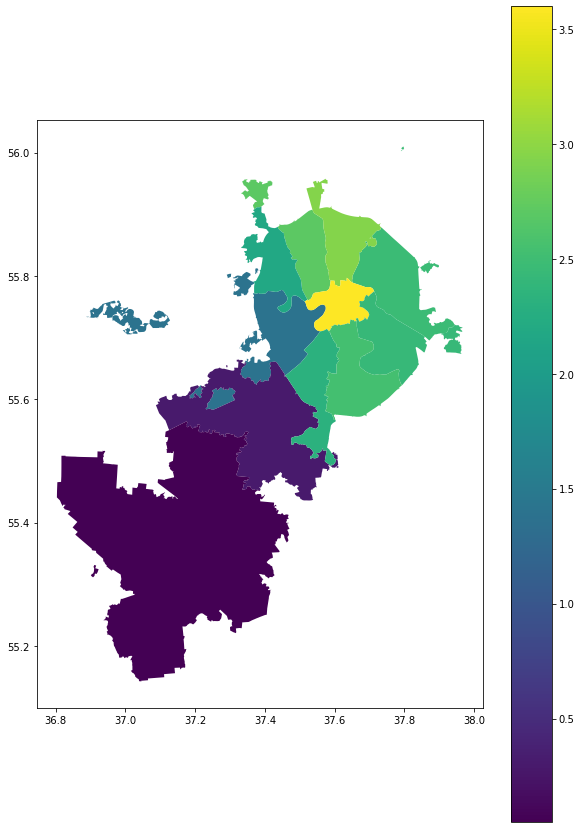

In [383]:
gdf_msc_regions.plot(column='density', figsize=(10,15),legend=True);

In [182]:
gdf_msc_regions.to_file('gdf_msc_regions.geojson', driver='GeoJSON')